In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
train=pd.read_csv('train.csv')

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
X=train.drop("Survived",axis=1)
Y=train["Survived"].copy()

In [0]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

class DataFrameRemover(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_list):
        self.attribute_list=attribute_list
    def fit(self,X):
        return self
    def transform(self,X):
        return X.drop(self.attribute_list,axis=1)

class OneHotEncoder(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_list):
        self.attribute_list=attribute_list
        self.one_hot_list=[]
    def fit(self,X):
        for attribute in self.attribute_list:
            one_hot_data=pd.get_dummies(X[attribute],prefix=attribute)
            self.one_hot_list.append(one_hot_data)
        return self
    def transform(self,X):
        new_X=X.drop(self.attribute_list,axis=1)
        new_X=pd.concat([new_X]+self.one_hot_list,axis=1)
        
        return new_X 

In [0]:
preprocessing_pipeline=Pipeline([
    ('data_remover',DataFrameRemover(["PassengerId","Name","Ticket","Cabin"])), # 불필요한 특성 제거
    ('one_hot_encoder',OneHotEncoder(["Sex","Embarked"])), # 범주형 데이터 인코딩
    ('imputer',SimpleImputer(strategy="median")), # 누락된 행 전처리
    ('scaler',MinMaxScaler()) # 스케일링
])

In [0]:
preprocessed_X=preprocessing_pipeline.fit_transform(X)

In [35]:
pd.DataFrame(preprocessed_X)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,1.0
4,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0
887,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0
888,1.0,0.346569,0.125,0.333333,0.045771,1.0,0.0,0.0,0.0,1.0
889,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,1.0,0.0,0.0


In [0]:
train_idx=int(len(preprocessed_X)*0.9)
train_X,train_Y,test_X,test_Y=preprocessed_X[:train_idx],Y[:train_idx],preprocessed_X[train_idx:],Y[train_idx:]

In [42]:
train_X.shape

(801, 10)

In [43]:
train_Y.shape

(801,)

In [48]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(units=10,activation='relu',input_shape=(10,)),
                           tf.keras.layers.Dense(units=10,activation='relu'),
                           tf.keras.layers.Dense(units=10,activation='relu'),
                           tf.keras.layers.Dense(units=2,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 22        
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


In [50]:
history=model.fit(train_X,train_Y,epochs=50,validation_split=0.25)

Train on 600 samples, validate on 201 samples
Epoch 1/50
600/600 [==============================] - 0s 94us/sample - loss: 0.4302 - accuracy: 0.8150 - val_loss: 0.4289 - val_accuracy: 0.8060
Epoch 2/50
600/600 [==============================] - 0s 85us/sample - loss: 0.4247 - accuracy: 0.8167 - val_loss: 0.4358 - val_accuracy: 0.8109
Epoch 3/50
600/600 [==============================] - 0s 82us/sample - loss: 0.4268 - accuracy: 0.8250 - val_loss: 0.4277 - val_accuracy: 0.8010
Epoch 4/50
600/600 [==============================] - 0s 81us/sample - loss: 0.4223 - accuracy: 0.8250 - val_loss: 0.4353 - val_accuracy: 0.8109
Epoch 5/50
600/600 [==============================] - 0s 83us/sample - loss: 0.4243 - accuracy: 0.8167 - val_loss: 0.4293 - val_accuracy: 0.8109
Epoch 6/50
600/600 [==============================] - 0s 85us/sample - loss: 0.4193 - accuracy: 0.8217 - val_loss: 0.4354 - val_accuracy: 0.8109
Epoch 7/50
600/600 [==============================] - 0s 81us/sample - loss: 0.4234 

<function matplotlib.pyplot.show>

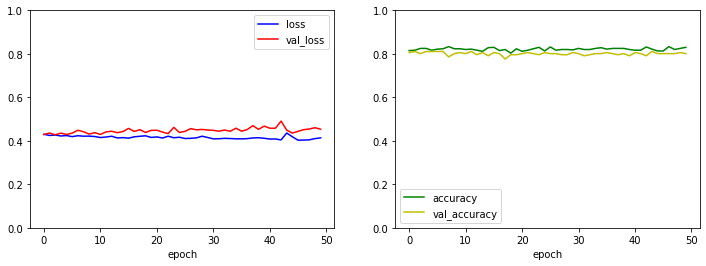

In [51]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'y-',label='val_accuracy')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend()

plt.show

In [52]:
model.evaluate(test_X,test_Y)

90/90 [==============================] - 0s 78us/sample - loss: 0.4619 - accuracy: 0.7778


[0.46191861165894404, 0.7777778]